## Notebook 1: Data Exploration
Explore the customer churn dataset and understand patterns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
# Load the dataset
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dataset Information
print("Dataset Info:")
print("="*60)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [6]:
# Basic Statistics
print("\nBasic Statistics:")
print("="*60)
df.describe()



Basic Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check for missing values
print("\nMissing Values:")
print("="*60)
missing = df.isnull().sum()
missing[missing > 0]



Missing Values:


Series([], dtype: int64)

In [8]:
# Target variable distribution
print("\nChurn Distribution:")
print("="*60)
churn_dist = df['Churn'].value_counts()
print(churn_dist)
print(f"\nChurn Rate: {(churn_dist['Yes'] / len(df)) * 100:.2f}%")



Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


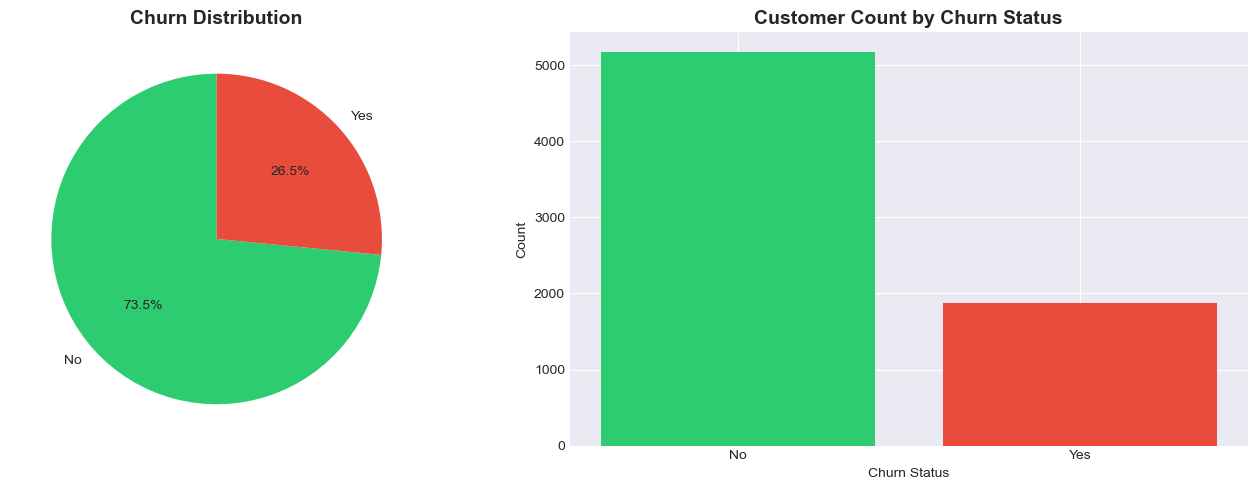

In [11]:
# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(churn_dist.values, labels=churn_dist.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(churn_dist.index, churn_dist.values, color=['#2ecc71', '#e74c3c'])
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Count')
axes[1].set_title('Customer Count by Churn Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/churn_distribution.png', dpi=300)
plt.show()


In [14]:
#convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [19]:
#checknulls
df['TotalCharges'].isna().sum()

0

In [18]:
#Handle missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [20]:
# Numerical features analysis
print("\nNumerical Features:")
print("="*60)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")




Numerical Features:

tenure:
  Mean: 32.37
  Median: 29.00
  Std: 24.56

MonthlyCharges:
  Mean: 64.76
  Median: 70.35
  Std: 30.09

TotalCharges:
  Mean: 2281.92
  Median: 1397.47
  Std: 2265.27


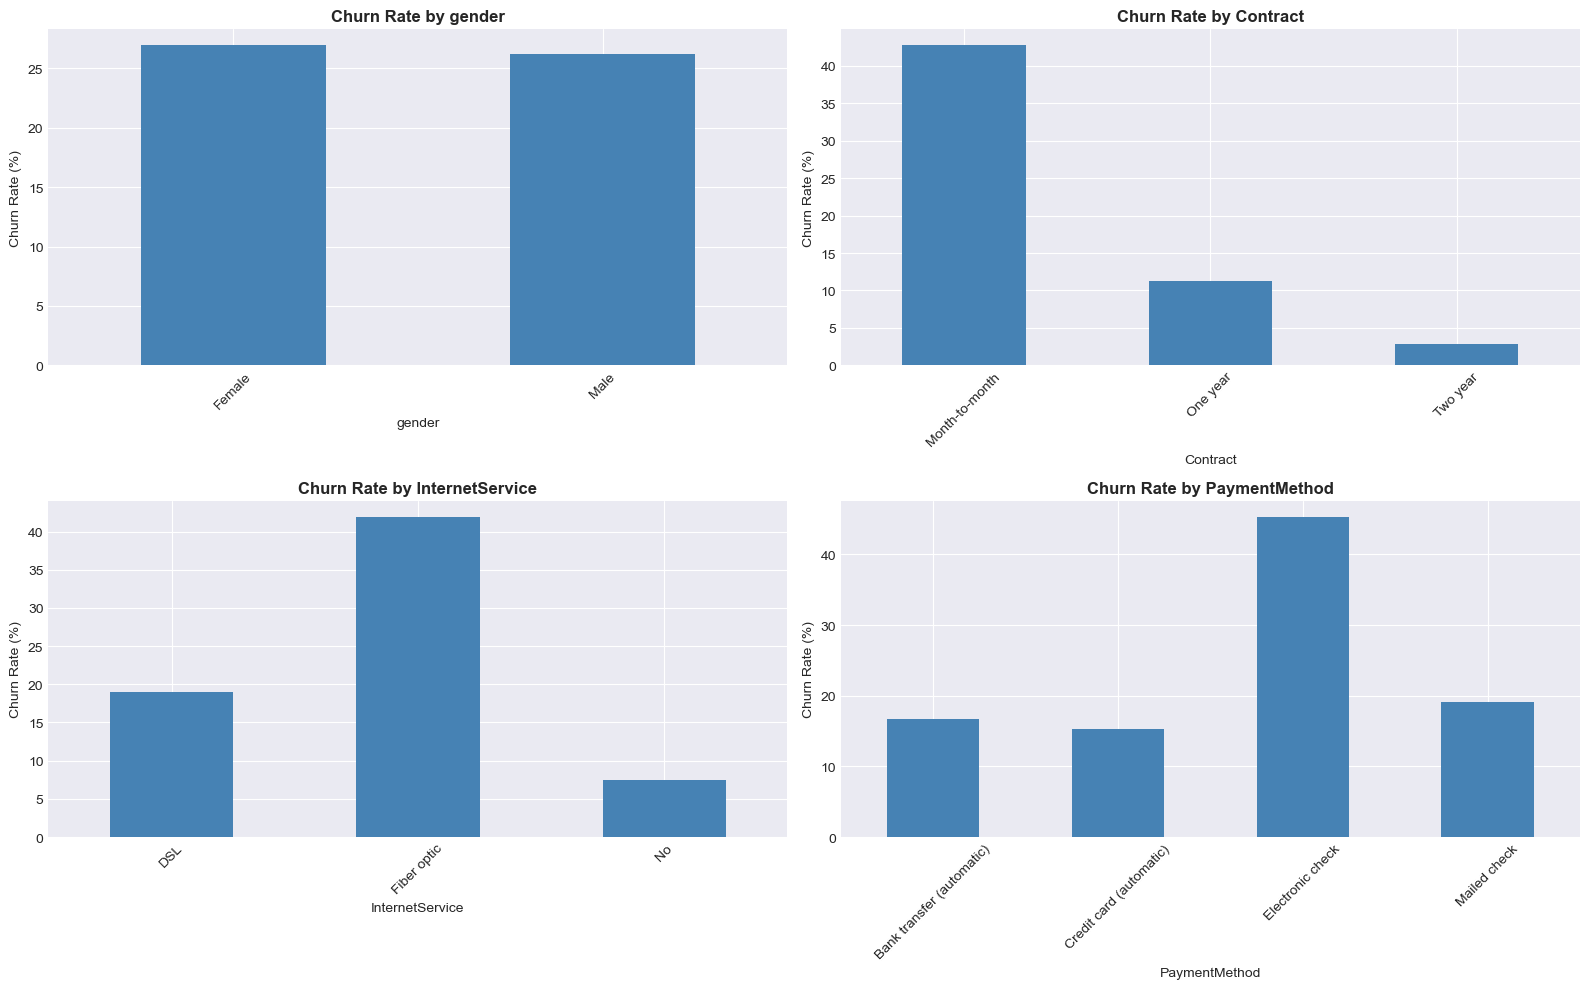

In [21]:
# Categorical features analysis
categorical_cols = ['gender', 'Contract', 'InternetService', 'PaymentMethod']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').sum() / len(x) * 100)
    churn_rate.plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_ylabel('Churn Rate (%)')
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../outputs/figures/categorical_features.png', dpi=300)
plt.show()


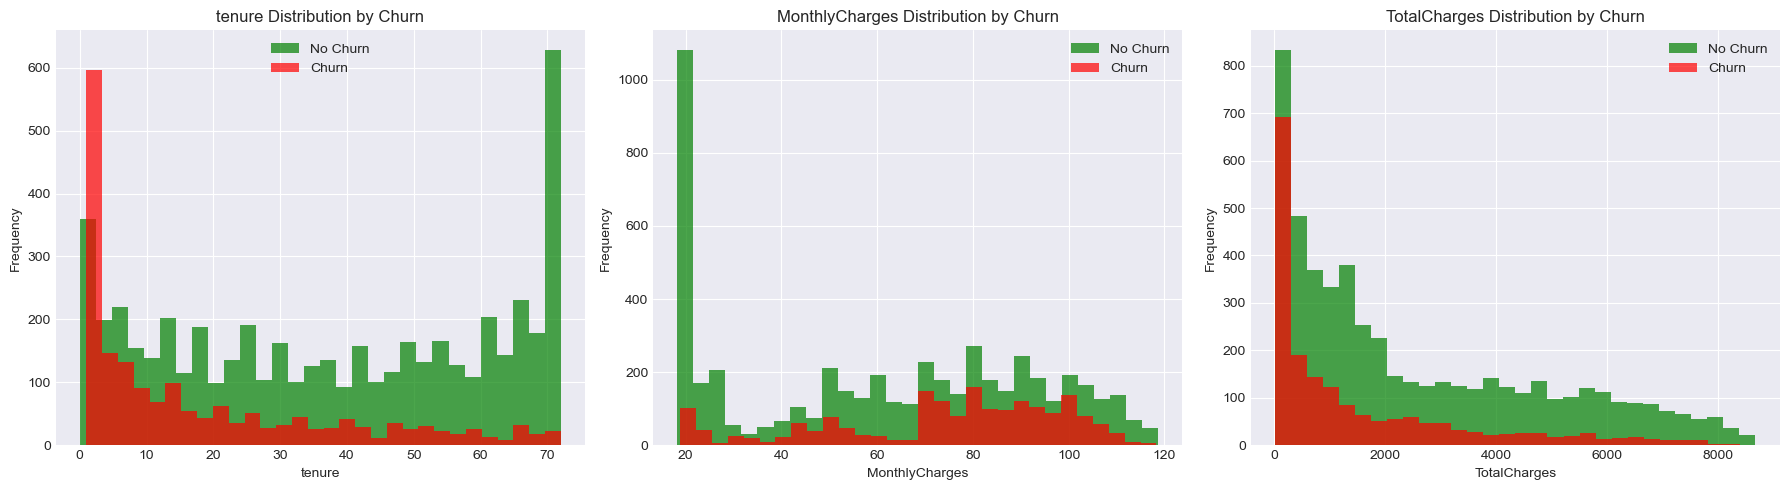

In [22]:
# Visualize numerical features by churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    if col == 'TotalCharges':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df[df['Churn']=='No'][col].hist(bins=30, alpha=0.7, label='No Churn', 
                                     color='green', ax=axes[idx])
    df[df['Churn']=='Yes'][col].hist(bins=30, alpha=0.7, label='Churn', 
                                      color='red', ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} Distribution by Churn')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('../outputs/figures/numerical_features.png', dpi=300)
plt.show()


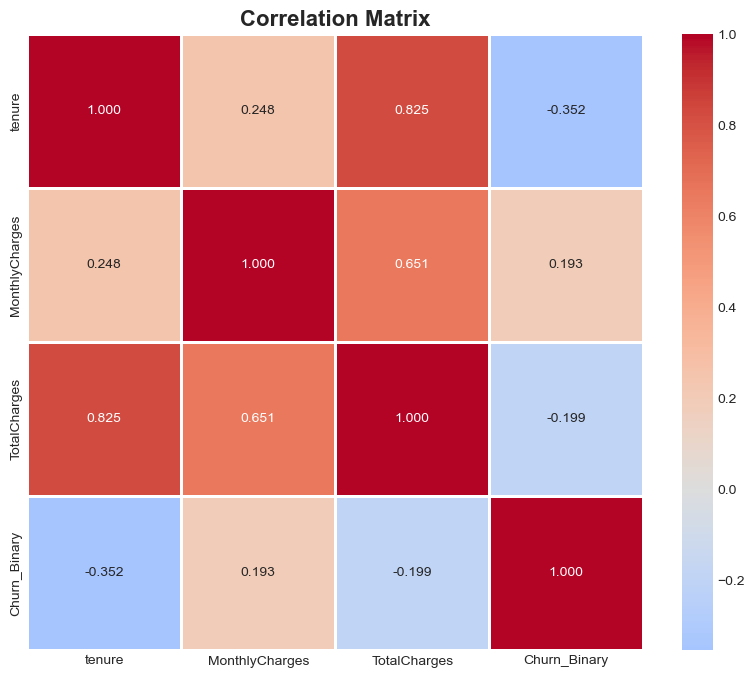

In [23]:
# Correlation heatmap
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)

correlation_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']
correlation = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.savefig('../outputs/figures/correlation_heatmap.png', dpi=300)
plt.show()


In [24]:
# Key insights summary
print("\n" + "="*60)
print("KEY INSIGHTS FROM EXPLORATION")
print("="*60)

print("\n1. Dataset Overview:")
print(f"   - Total customers: {len(df)}")
print(f"   - Features: {df.shape[1]}")
print(f"   - Churn rate: {(df['Churn']=='Yes').sum() / len(df) * 100:.1f}%")

print("\n2. Churn Patterns:")
print(f"   - Month-to-month contracts have highest churn")
print(f"   - New customers (low tenure) churn more")
print(f"   - Fiber optic users show higher churn")

print("\n3. Data Quality:")
print(f"   - Missing values in TotalCharges: {df['TotalCharges'].isna().sum()}")
print(f"   - Need to handle categorical encoding")
print(f"   - Feature engineering opportunities identified")

print("\n✓ Exploration complete! Ready for preprocessing.")




KEY INSIGHTS FROM EXPLORATION

1. Dataset Overview:
   - Total customers: 7043
   - Features: 22
   - Churn rate: 26.5%

2. Churn Patterns:
   - Month-to-month contracts have highest churn
   - New customers (low tenure) churn more
   - Fiber optic users show higher churn

3. Data Quality:
   - Missing values in TotalCharges: 0
   - Need to handle categorical encoding
   - Feature engineering opportunities identified

✓ Exploration complete! Ready for preprocessing.
